In [748]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [772]:
data = pd.read_csv("Full_Data.csv")
data_X = data.values[:, :-1]
data_Y = data.values[:, -1].astype("int")

# Splitting dataset into training and test set
X_full, test_X_full, Y, test_Y = train_test_split(data_X, data_Y, test_size=0.4, shuffle=True, random_state=1)


In [866]:
# Removing all columns other than two
attr1 = 3
attr2 = 4
X = X_full[:, (attr1, attr2)]
test_X = test_X_full[:, (attr1, attr2)]


Text(0, 0.5, 'Attribute 2')

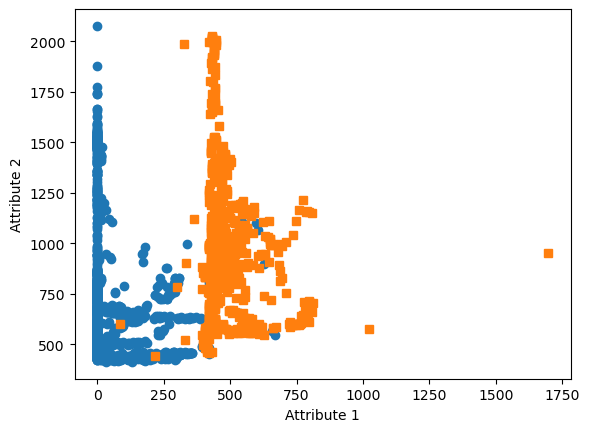

In [867]:
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "o")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "s")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")

In [868]:
# Combining input data with fabricated output class
X = np.hstack((np.ones((X.shape[0], 1)), X))
print("The regenerated input data has class labels set to 1:\n", X)

The regenerated input data has class labels set to 1:
 [[   1.    461.   1019.  ]
 [   1.     33.5   420.5 ]
 [   1.    455.5   830.25]
 ...
 [   1.    758.25 1164.75]
 [   1.     23.5   424.75]
 [   1.    574.25  579.25]]


In [869]:
def sigmoid(z):
    # z --> input
    # sigmoid_z --> output of sigmoid function
    z = z.astype(float)
    sigmoid_z =1/(1+np.exp(-z))
    
    return sigmoid_z

In [870]:
def loss(Y, y_hat):
    # Y --> data
    # y_hat --> w
    loss = (1/X.shape[0])*np.sum([(Y)*np.log(y_hat) +(1-Y)*np.log(1-y_hat)])
    
    return -loss


In [871]:
# Defining gradient function
def gradients(X, Y, y_hat):
    # X --> input
    # Y --> true/target value
    # y_hat --> hypothesis/predictions
    # n --> number of training examples
    
    n = X.shape[0]
    
    # Gradient of loss w.r.t weights
    dw = (1/n)*(np.dot(X.T, (y_hat-Y)))
    
    return dw

In [872]:
# Defining data normalization function
def normalize(X):
    # X --> input
    # n --> number of training examples
    # d --> number of features 
    n, d = X.shape
    
    # Normalizing all the d features of X (except the bias (first) column)
    for i in range(d-1):
        X[:,i+1] = (X[:,i+1] - X[:,i+1].mean(axis=0))/X[:,i+1].std(axis=0)
        
    return X

In [942]:
# Defining prediction function
def predict(X,w):
    # X --> Input.
    
    # Normalizing the inputs.
    X = normalize(X)
    
    # Calculating prediction/y_hat.
    preds = sigmoid(np.dot(X, w))
    
    # Empty List to store predictions.
    pred_class = []
    pred_class = [np.round(y,3) for y in preds] 

    return np.array(pred_class)
predict(X, [1,2,3]).shape

(3700,)

In [943]:
# Defining function to plot decision boundary
def plot_decision_boundary(X,w):
    ydisp = -(w[0] + w[1] * X)/w[2]
    
    fig = plt.figure(figsize=(10, 8))
    plt.plot(X[:, 1][Y==0], X[:, 2][Y==0], "^")
    plt.plot(X[:, 1][Y==1], X[:, 2][Y==1], "s")
    
    plt.xlim([-2, 5])
    plt.ylim([-2, 5])
    plt.xlabel("Attribute 1")
    plt.ylabel("Attribute 2")
    plt.title("Decision Boundary")
    plt.plot(X, ydisp)

In [944]:
# Defining training function
def train(X, Y, epochs, eta):
    # X --> input
    # Y --> true/target value
    # bs --> batch size
    # eta --> learning rate
    # n-> number of training examples
    # d-> number of features 
    
    n, d = X.shape
    
    # Initializing weights and bias to zeros
    w = np.zeros((d,1))
    
    # Reshaping Y
    Y = Y.reshape(n,1)
    
    # Normalizing the inputs
    X = normalize(X)
    
    # Empty list to store losses
    losses = []
    
    # Training loop
    for epoch in range(epochs):
        # Calculating hypothesis/prediction
            y_hat = predict(X,w)
            
            # Getting the gradients of loss w.r.t parameters
            dw = gradients(X,Y,y_hat)
            
            # Updating the parameters.
            w = w- eta*dw
            
            # Calculating loss and appending it in the list
            l = loss(Y,y_hat)
            losses.append(l)
        
    # Returning weights, losses(List)
    return w, losses

In [912]:
w, l = train(X, Y, epochs=100,eta=0.61)
print(random.choice(predict(X,w)))
print("The accuracy of model is",(np.sum(1*(Y==predict(X,w)))/len(Y))*100,"%")



C:\Users\giggl\AppData\Local\Temp\ipykernel_15512\3267187283.py:4: RuntimeWarning: divide by zero encountered in log
  loss = (1/X.shape[0])*np.sum([(Y)*np.log(y_hat) +(1-Y)*np.log(1-y_hat)])
C:\Users\giggl\AppData\Local\Temp\ipykernel_15512\3267187283.py:4: RuntimeWarning: invalid value encountered in multiply
  loss = (1/X.shape[0])*np.sum([(Y)*np.log(y_hat) +(1-Y)*np.log(1-y_hat)])


[0.009]
The accuracy of model is 95.67567567567568 %


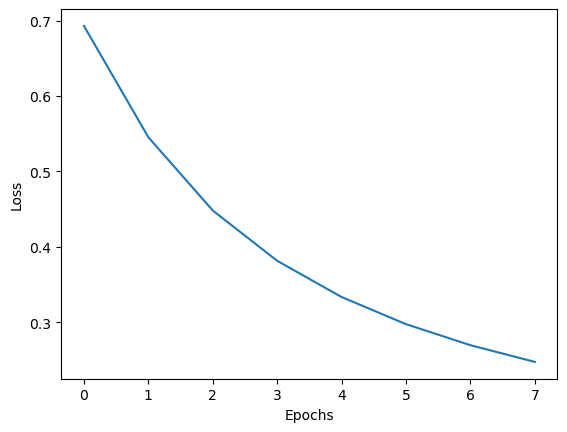

The accuracy of model is 95.67567567567568 %
[[0.94 ]
 [0.012]
 [0.906]
 ...
 [0.999]
 [0.01 ]
 [0.966]] [1 0 1 ... 1 0 1]


In [913]:
# Plotting loss vs. epoch function
plt.plot(l)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

print("The accuracy of model is",(np.sum(1*(Y==predict(X,w)))/len(Y))*100,"%")
print(predict(X,w),Y)

3700


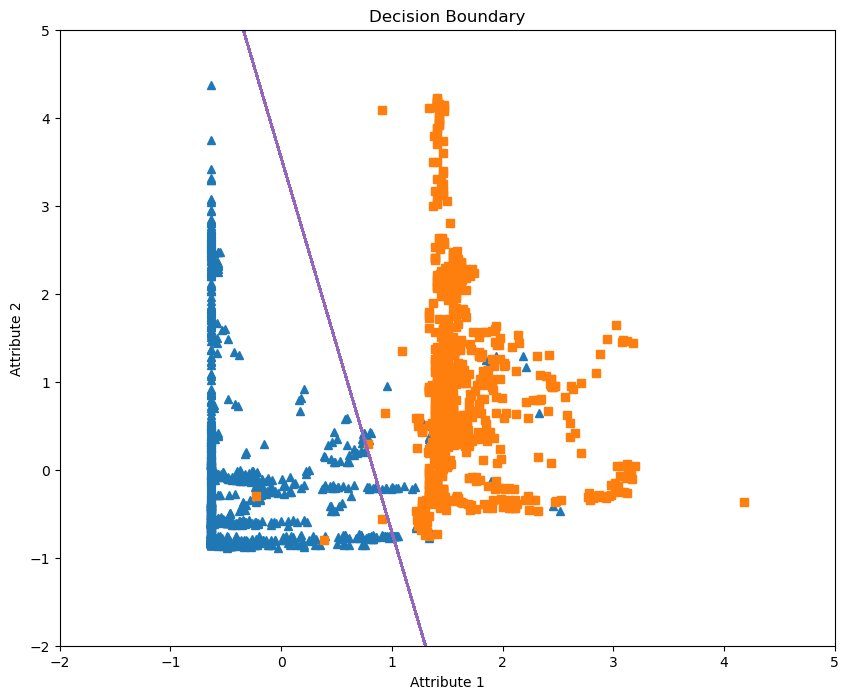

In [914]:
plot_decision_boundary(X, w)
print(X.shape[0])


In [964]:
print(test_X.shape)
test_X = test_X_full[:, (attr1, attr2)]
test_X = np.hstack((np.ones((test_X.shape[0],1)), test_X))
ml_predictions = predict(test_X,w)
print("The test accuracy of model is",(np.sum(1*(test_Y==ml_predictions))/len(test_Y))*100,"%")
print(test_X)
x=[[1],[2],[3]]
##list(zip(*x)[0]) 
ml=list(zip(*ml_predictions))[0]
ml=np.array(list(zip(*ml_predictions))[0])
print(ml.shape)




(2468, 3)
The test accuracy of model is 43.76012965964344 %
[[ 1.          1.48350484  1.34520692]
 [ 1.         -0.61308551 -0.8122984 ]
 [ 1.         -0.61308551 -0.54930678]
 ...
 [ 1.          0.69339817 -0.78090175]
 [ 1.         -0.61308551 -0.58502169]
 [ 1.         -0.61308551  0.23642127]]
(2468,)


In [962]:
test_X = test_X_full[:, (attr1, attr2)]
test_X = np.hstack((np.ones((test_X.shape[0],1)), test_X))
X_full, test_X_full, Y, test_Y = train_test_split(data_X, data_Y, test_size=0.4, shuffle=True, random_state=1)
print(ml_predictions.shape, Y.shape)
row_idx = np.concatenate((test_X_full[:, 0].astype(int), X_full[:, 0].astype(int)))
#ml=np.array(list(zip(*ml_predictions))[0])
opt_cls = np.concatenate((np.array(list(zip(*ml_predictions))[0]).astype(int), Y.astype(int)))
                              
output_data = np.concatenate((row_idx.reshape(-1,1), opt_cls.reshape(-1,1)), axis=1)
pd.DataFrame(output_data, columns=["RowIdx", "OutputClass"]).to_csv("Output_Data.csv", index=False)

(2468, 1) (3700,)
